Objective:
    
    
Develop a machine learning model to predict customer churn based on historical customer data. You 
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

# Loading Libraries and Data

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



import tensorflow
import tensorflow as tf
import keras 
from tensorflow import keras


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
#loading data

In [161]:
df=pd.read_excel('customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Understanding Data 

In [162]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [163]:
df.shape

(100000, 9)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [165]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

Target Column:Churn

Customers who left – the column is called Churn

In [166]:
df[['CustomerID','Name']]

,CustomerID,Name
0,1,Customer_1
1,2,Customer_2
2,3,Customer_3
3,4,Customer_4
4,5,Customer_5
...,...,...
99995,99996,Customer_99996
99996,99997,Customer_99997
99997,99998,Customer_99998
99998,99999,Customer_99999


Duplicate Columns

Uncessary Columns-
	CustomerID	& Name

In [167]:
df.drop(['CustomerID','Name'],axis=1,inplace=True)

# Data Visualization

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23364\2446670223.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0) ],
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23364\2446670223.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1) ],


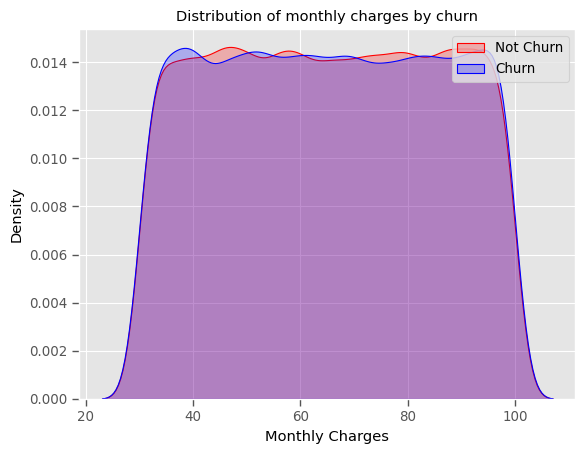

In [168]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

[]

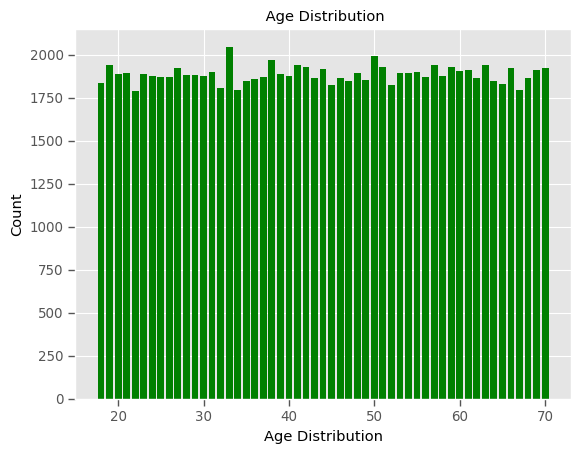

In [169]:

AgeDis=df['Age'].value_counts()
plt.title(' Age Distribution')
plt.bar(AgeDis.index,AgeDis.values,color='Green')
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.plot()

In [170]:
Churn_t=df[df['Churn']==1]
Churn_f=df[df['Churn']==0]
Churn_t['Age']=Churn_t['Age'].astype(int)
Churn_f['Age']=Churn_t['Age'].astype(int)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23364\1211642054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_t['Age']=Churn_t['Age'].astype(int)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23364\1211642054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_f['Age']=Churn_t['Age'].astype(int)


Gender Wise Churning

([<matplotlib.patches.Wedge at 0x1679e012fe0>,
 [Text(-0.003783412343000666, 1.0999934935221405, 'Female'),
  Text(0.0037833093541772243, -1.0999934938763642, 'Male')],
 [Text(-0.002063679459818545, 0.5999964510120765, '50.1%'),
  Text(0.0020636232840966677, -0.5999964512052894, '49.9%')])

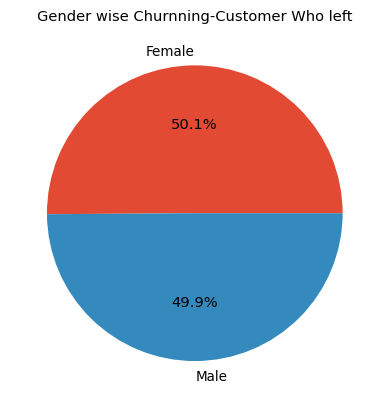

In [171]:
plt.title('Gender wise Churnning-Customer Who left')
GenderC=Churn_t['Gender'].value_counts()
plt.pie(GenderC,autopct = '%1.1f%%',labels=GenderC.index)


([<matplotlib.patches.Wedge at 0x167a32be050>,
 [Text(-0.01111278271557017, 1.0999438649587154, 'Female'),
  Text(0.011112782715570035, -1.0999438649587154, 'Male')],
 [Text(-0.006061517844856456, 0.599969380886572, '50.3%'),
  Text(0.0060615178448563825, -0.599969380886572, '49.7%')])

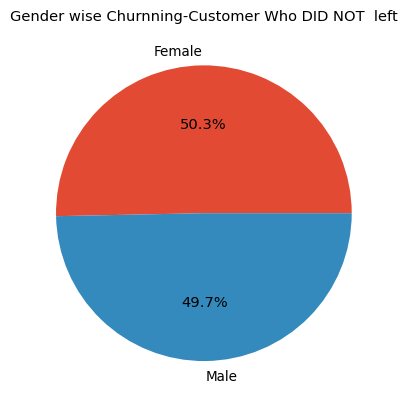

In [172]:
plt.title('Gender wise Churnning-Customer Who DID NOT  left')
GenderC=Churn_f['Gender'].value_counts()
plt.pie(GenderC,autopct = '%1.1f%%',labels=GenderC.index)

Geographical/Location Wise Churning

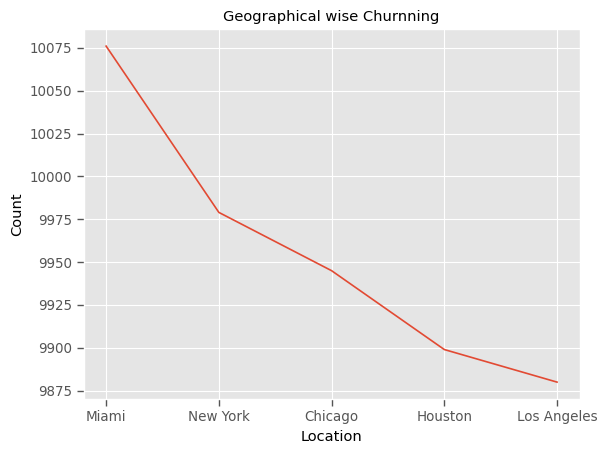

In [173]:
plt.title('Geographical wise Churnning')
plt.xlabel('Location')
plt.ylabel('Count')
geo=Churn_t['Location'].value_counts()
plt.plot(geo.index,geo.values)


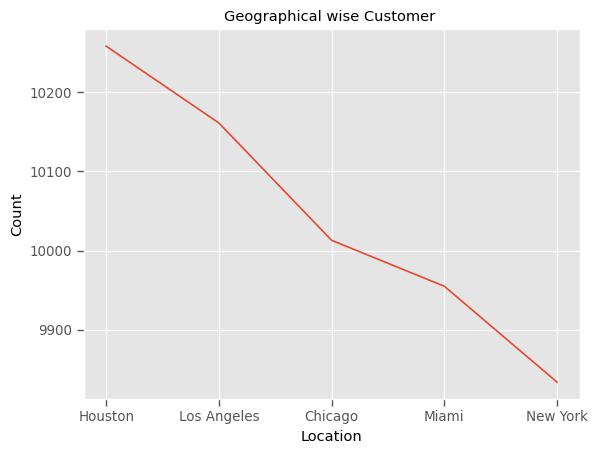

In [174]:
plt.title('Geographical wise Customer ')
plt.xlabel('Location')
plt.ylabel('Count')
geo=Churn_f['Location'].value_counts()
plt.plot(geo.index,geo.values)

AGE WISE CHURNING

<BarContainer object of 53 artists>

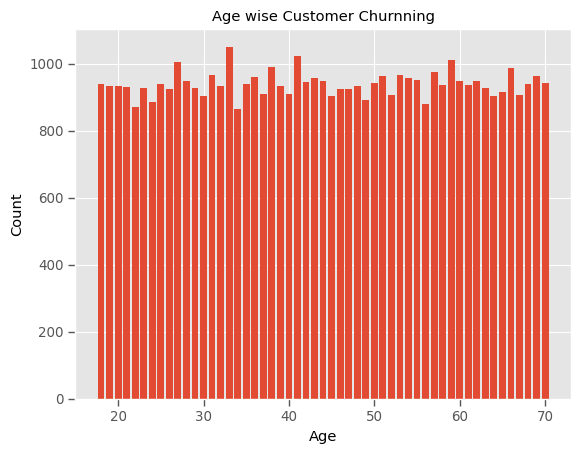

In [175]:
plt.title('Age wise Customer Churnning')
plt.xlabel('Age')
plt.ylabel('Count')
Age=Churn_t['Age'].value_counts()
plt.bar(Age.index,Age.values)

<BarContainer object of 53 artists>

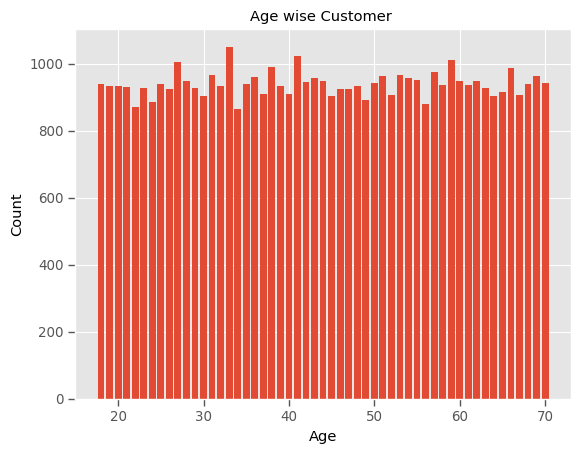

In [176]:
plt.title('Age wise Customer ')
plt.xlabel('Age')
plt.ylabel('Count')
Age=Churn_t['Age'].value_counts()
plt.bar(Age.index,Age.values)

Subscription_Length_Months wise Churnning

([<matplotlib.patches.Wedge at 0x167a312ccd0>,
 [Text(1.0899923514776662, 0.1480428104305908, '22'),
  Text(1.011047781095942, 0.43333864856595955, '1'),
  Text(0.8590584652632715, 0.6870360640166663, '20'),
  Text(0.6454793419195508, 0.8907055737757027, '16'),
  Text(0.38673791540377395, 1.0297736570670002, '7'),
  Text(0.10180014379355712, 1.0952792934788877, '2'),
  Text(-0.1897822868623844, 1.083504814753162, '13'),
  Text(-0.46693966744966364, 0.9959755754846591, '11'),
  Text(-0.7103846411834407, 0.8398533571824753, '3'),
  Text(-0.9044487525834465, 0.6260770351564158, '12'),
  Text(-1.0361322632194563, 0.36936422825678106, '24'),
  Text(-1.0964908143320917, 0.0877946130770364, '10'),
  Text(-1.081829730650498, -0.1991091004466425, '14'),
  Text(-0.9935309041044472, -0.47211899198125884, '19'),
  Text(-0.8376750234028176, -0.7129520006052926, '18'),
  Text(-0.6262197247658042, -0.9043499634069991, '23'),
  Text(-0.37475396757690604, -1.0341950801398, '8'),
  Text(-0.0990348611432

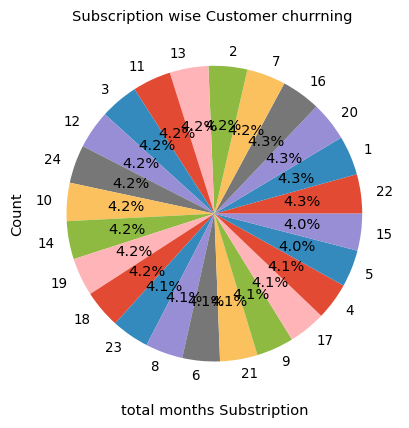

In [177]:
Sub_wise=Churn_t['Subscription_Length_Months'].value_counts()
plt.title('Subscription wise Customer churrning ')
plt.xlabel('total months Substription')
plt.ylabel('Count')

plt.pie(Sub_wise,autopct = '%1.1f%%',labels=Sub_wise.index)

([<matplotlib.patches.Wedge at 0x167a3132e90>,
 [Text(1.0898994613429798, 0.1487251295655258, '20'),
  Text(1.010558360986859, 0.4344787670756229, '5'),
  Text(0.8587966646726086, 0.6873632873140689, '6'),
  Text(0.6461350388402181, 0.8902300329594314, '14'),
  Text(0.3883771797240862, 1.0291565314710707, '22'),
  Text(0.10453777565224567, 1.095021394065742, '2'),
  Text(-0.18582299892424334, 1.0841908563859044, '21'),
  Text(-0.46284362631979653, 0.9978856535571301, '15'),
  Text(-0.7072918301524088, 0.8424596530396316, '1'),
  Text(-0.9024934696557634, 0.6288923097229777, '11'),
  Text(-1.0350459756925166, 0.37239740627819445, '16'),
  Text(-1.0962406987761386, 0.09086435135301157, '18'),
  Text(-1.082270554537084, -0.19669887336228603, '9'),
  Text(-0.9942507289117078, -0.4706011985307067, '7'),
  Text(-0.8389762776896263, -0.7114202734488659, '4'),
  Text(-0.6280169471816041, -0.9031028258469235, '10'),
  Text(-0.37553594278020214, -1.0339113867639649, '12'),
  Text(-0.098508262093

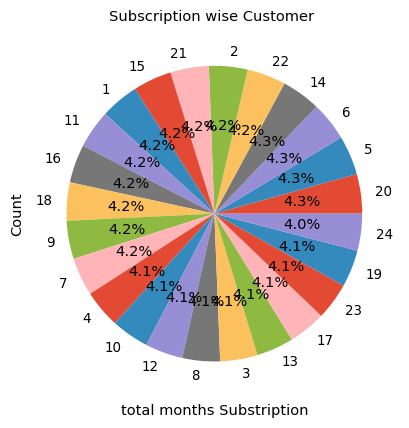

In [178]:
Sub_wise=Churn_f['Subscription_Length_Months'].value_counts()
plt.title('Subscription wise Customer ')
plt.xlabel('total months Substription')
plt.ylabel('Count')

plt.pie(Sub_wise,autopct = '%1.1f%%',labels=Sub_wise.index)

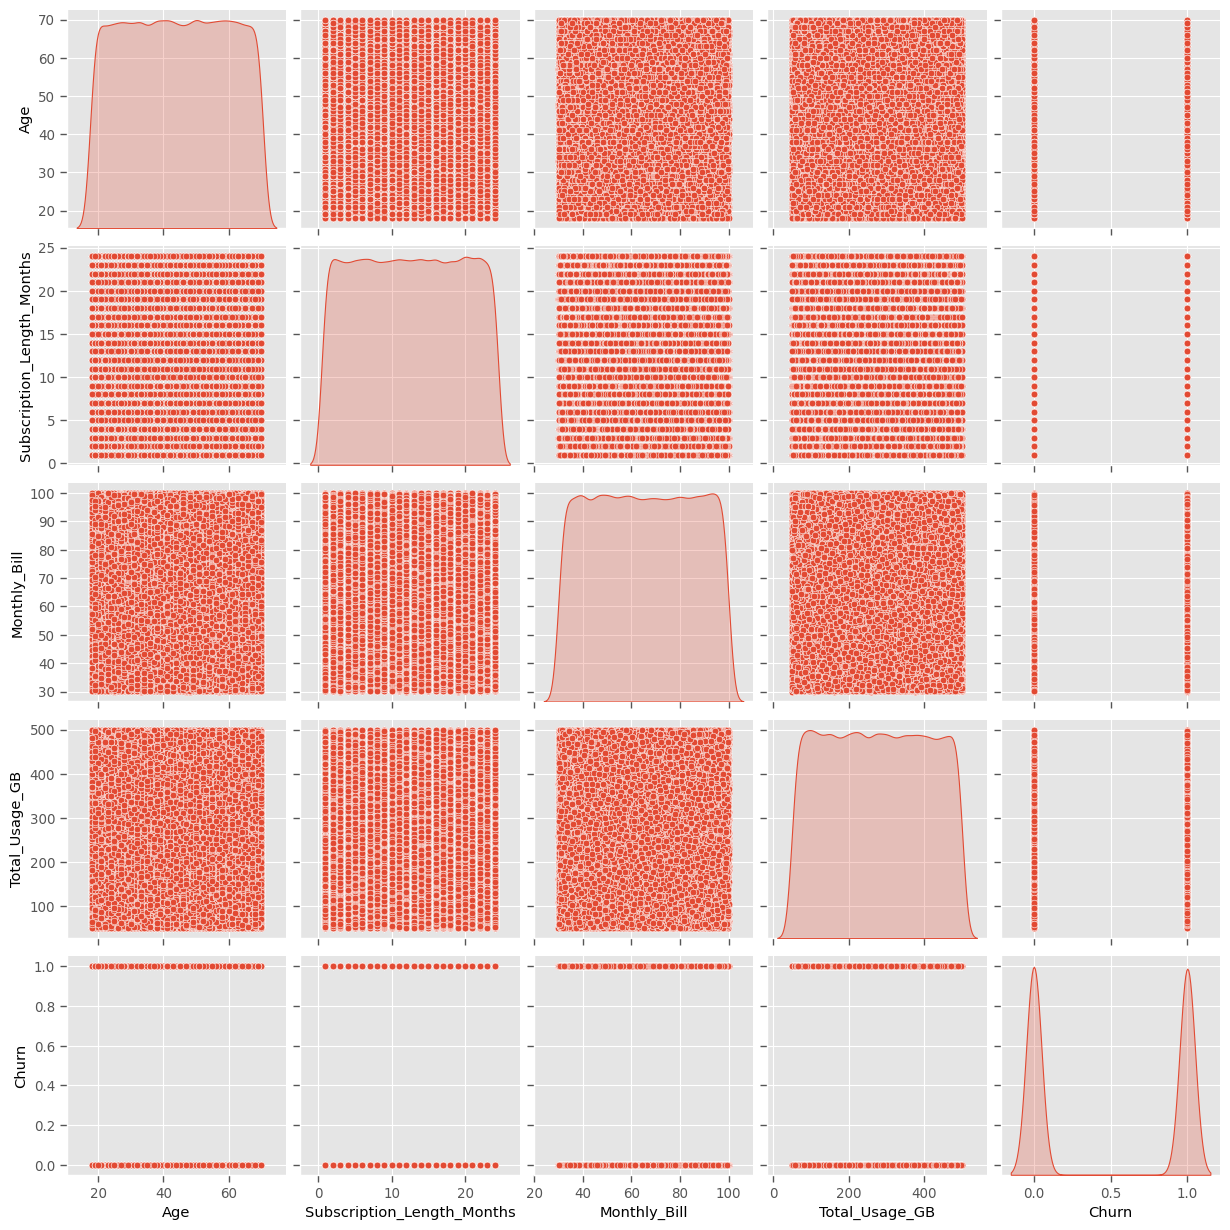

In [179]:
#Separating columns to be visualized
out_cols = list(set(df.nunique()[df.nunique()<6].keys().tolist()
                    + df.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in df.columns if x not in out_cols] + ['Churn']

sns.pairplot(df[viz_cols], diag_kind="kde")
plt.show()

# Feature Engineering

In [180]:
df.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [181]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [182]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


Age Wise Churn 

In [183]:

Age_wise_Churn=df.groupby(['Age'])['Churn'].mean()
df['Age_wise_Churn']=df['Age'].map(Age_wise_Churn)
print(Age_wise_Churn)

Age
18    0.510604
19    0.480680
20    0.494698
21    0.489721
22    0.486849
23    0.491786
24    0.472814
25    0.502405
26    0.493063
27    0.522869
28    0.504519
29    0.491777
30    0.482667
31    0.508154
32    0.516022
33    0.513196
34    0.480801
35    0.508401
36    0.516945
37    0.487166
38    0.502030
39    0.493919
40    0.484800
41    0.527076
42    0.489119
43    0.513151
44    0.494781
45    0.494253
46    0.494906
47    0.499729
48    0.492876
49    0.480583
50    0.472445
51    0.499222
52    0.497259
53    0.510290
54    0.505274
55    0.501053
56    0.470085
57    0.502575
58    0.499467
59    0.524378
60    0.497374
61    0.490309
62    0.507231
63    0.476828
64    0.489719
65    0.499727
66    0.514048
67    0.503893
68    0.503489
69    0.504184
70    0.490370
Name: Churn, dtype: float64



Location Wise Bill

In [184]:
Location_wise_Bill=df.groupby(['Location'])['Monthly_Bill'].mean()
df['Location_wise_Bill']=df['Location'].map(Location_wise_Bill)
print(Location_wise_Bill)

Location
Chicago        64.819357
Houston        65.127926
Los Angeles    65.192377
Miami          64.951278
New York       65.174980
Name: Monthly_Bill, dtype: float64


Age Wise Monthly Bill


In [185]:
Age_Wise_Monthly_Bill=df.groupby(['Age'])['Monthly_Bill'].mean()
df['Age_Wise_Monthly_Bill']=df['Age'].map(Age_Wise_Monthly_Bill)

print(Age_Wise_Monthly_Bill)

Age
18    65.601762
19    64.132705
20    64.802063
21    64.689215
22    64.302311
23    64.782777
24    65.687271
25    64.952822
26    65.210672
27    65.482869
28    65.366172
29    64.754170
30    64.119813
31    64.835139
32    65.441475
33    64.892991
34    65.833317
35    65.317940
36    65.371689
37    64.986321
38    65.494157
39    64.710085
40    64.608907
41    65.594605
42    65.180394
43    65.601728
44    64.993779
45    64.860865
46    64.385303
47    65.032777
48    65.253889
49    64.625248
50    64.875546
51    65.164686
52    66.184095
53    65.212707
54    65.496086
55    65.317553
56    64.770208
57    64.227456
58    65.346119
59    65.435576
60    66.140457
61    64.835888
62    63.962957
63    65.666277
64    64.855898
65    64.633557
66    64.099802
67    65.614978
68    65.154933
69    64.703206
70    65.282207
Name: Monthly_Bill, dtype: float64


 age_wise_Monthly_Bill wise Churn 

In [186]:
Age_Wise_Monthly_Bill_Churn=df.groupby(['Age_Wise_Monthly_Bill'])['Churn'].mean()
df['Age_Wise_Monthly_Bill_Churn']=df['Age_Wise_Monthly_Bill'].map(Age_Wise_Monthly_Bill_Churn)

print(Age_Wise_Monthly_Bill_Churn)

Age_Wise_Monthly_Bill
63.962957    0.507231
64.099802    0.514048
64.119813    0.482667
64.132705    0.480680
64.227456    0.502575
64.302311    0.486849
64.385303    0.494906
64.608907    0.484800
64.625248    0.480583
64.633557    0.499727
64.689215    0.489721
64.703206    0.504184
64.710085    0.493919
64.754170    0.491777
64.770208    0.470085
64.782777    0.491786
64.802063    0.494698
64.835139    0.508154
64.835888    0.490309
64.855898    0.489719
64.860865    0.494253
64.875546    0.472445
64.892991    0.513196
64.952822    0.502405
64.986321    0.487166
64.993779    0.494781
65.032777    0.499729
65.154933    0.503489
65.164686    0.499222
65.180394    0.489119
65.210672    0.493063
65.212707    0.510290
65.253889    0.492876
65.282207    0.490370
65.317553    0.501053
65.317940    0.508401
65.346119    0.499467
65.366172    0.504519
65.371689    0.516945
65.435576    0.524378
65.441475    0.516022
65.482869    0.522869
65.494157    0.502030
65.496086    0.505274
65.594605 

In [187]:
#0=Male & 1=Female
df['Gender']=df['Gender'].str.replace("Male",'0').str.replace("Female",'1').astype(int)



In [188]:
df['Gender_Bill_Churn']=df.groupby(['Gender','Monthly_Bill'])['Churn'].transform('mean')


In [189]:
df.isnull().sum()

Age                            0
Gender                         0
Location                       0
Subscription_Length_Months     0
Monthly_Bill                   0
Total_Usage_GB                 0
Churn                          0
Age_wise_Churn                 0
Location_wise_Bill             0
Age_Wise_Monthly_Bill          0
Age_Wise_Monthly_Bill_Churn    0
Gender_Bill_Churn              0
dtype: int64

In [190]:
df.duplicated().sum()


0

# Data Cleaning/PreProcessing

In [191]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df['Location_enc']=LB.fit_transform(df['Location'])





In [192]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_wise_Churn,Location_wise_Bill,Age_Wise_Monthly_Bill,Age_Wise_Monthly_Bill_Churn,Gender_Bill_Churn,Location_enc
0,63,0,Los Angeles,17,73.36,236,0,0.476828,65.192377,65.666277,0.476828,0.538462,2
1,62,1,New York,1,48.76,172,0,0.507231,65.174980,63.962957,0.507231,0.777778,4
2,24,1,Los Angeles,5,85.47,460,0,0.472814,65.192377,65.687271,0.472814,0.250000,2
3,36,1,Miami,3,97.94,297,1,0.516945,64.951278,65.371689,0.516945,0.727273,3
4,46,1,Miami,19,58.14,266,0,0.494906,64.951278,64.385303,0.494906,0.285714,3


In [193]:
df[['Location','Location_enc']]

,Location,Location_enc
0,Los Angeles,2
1,New York,4
2,Los Angeles,2
3,Miami,3
4,Miami,3
...,...,...
99995,Houston,1
99996,New York,4
99997,Chicago,0
99998,New York,4


In [194]:
df.drop(['Location','Monthly_Bill','Gender'],axis=1,inplace=True)

<Axes: >

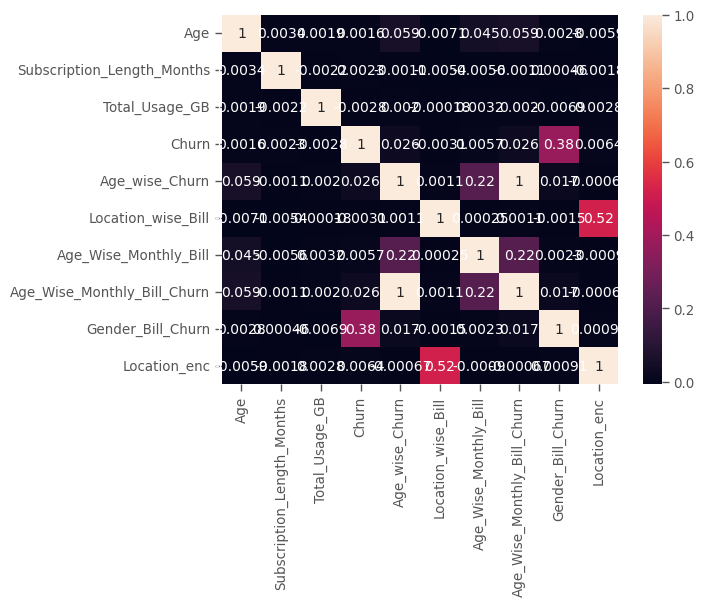

In [195]:
plt.style.use('ggplot')
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# DATA SPLITTING

In [196]:
X=df.copy()
X.drop(['Churn'],axis=1,inplace=True)
y=df['Churn']

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [198]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80000, 9), (80000,), (20000, 9), (20000,))

# FEATURE SELECTION

In [199]:
X_train.head()

,Age,Subscription_Length_Months,Total_Usage_GB,Age_wise_Churn,Location_wise_Bill,Age_Wise_Monthly_Bill,Age_Wise_Monthly_Bill_Churn,Gender_Bill_Churn,Location_enc
75220,54,5,205,0.505274,65.174980,65.496086,0.505274,0.800000,4
48955,28,24,239,0.504519,65.174980,65.366172,0.504519,0.222222,4
44966,57,12,62,0.502575,64.819357,64.227456,0.502575,0.636364,0
13568,19,19,173,0.480680,65.127926,64.132705,0.480680,0.400000,1
92727,56,8,314,0.470085,64.951278,64.770208,0.470085,0.333333,3


In [200]:
X_train.describe()

,Age,Subscription_Length_Months,Total_Usage_GB,Age_wise_Churn,Location_wise_Bill,Age_Wise_Monthly_Bill,Age_Wise_Monthly_Bill_Churn,Gender_Bill_Churn,Location_enc
count,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,44.016225,12.48990,274.662787,0.497794,65.053383,65.052239,0.497794,0.497689,2.000725
std,15.278733,6.91766,130.510754,0.013079,0.144517,0.503036,0.013079,0.188443,1.410895
min,18.000000,1.00000,50.000000,0.470085,64.819357,63.962957,0.470085,0.000000,0.000000
25%,31.000000,6.00000,161.000000,0.489721,64.951278,64.754170,0.489721,0.375000,1.000000
50%,44.000000,12.00000,274.000000,0.497374,65.127926,65.032777,0.497374,0.500000,2.000000
75%,57.000000,18.00000,388.000000,0.505274,65.174980,65.435576,0.505274,0.625000,3.000000
max,70.000000,24.00000,500.000000,0.527076,65.192377,66.184095,0.527076,1.000000,4.000000


In [201]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

9

In [202]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [203]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

1


In [204]:
x_train_T.duplicated()

Age                            False
Subscription_Length_Months     False
Total_Usage_GB                 False
Age_wise_Churn                 False
Location_wise_Bill             False
Age_Wise_Monthly_Bill          False
Age_Wise_Monthly_Bill_Churn     True
Gender_Bill_Churn              False
Location_enc                   False
dtype: bool

Filtering depending upon correlation matrix value

In [205]:
def handling_correlation(X_train,threshold=0):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [206]:
train=X_train.copy()
handling_correlation(train.copy(),0)

['Subscription_Length_Months',
 'Age_Wise_Monthly_Bill',
 'Age_Wise_Monthly_Bill_Churn',
 'Location_wise_Bill',
 'Total_Usage_GB',
 'Age_wise_Churn',
 'Location_enc',
 'Gender_Bill_Churn']

Calling variance threshold for threshold value = 0.8

In [207]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.8)
sel.fit(X_train)
sel.variances_

array([2.33436762e+02, 4.78534230e+01, 1.70328440e+04, 1.71050899e-04,
       2.08849679e-02, 2.53042159e-01, 1.71050899e-04, 3.55104140e-02,
       1.99059947e+00])

In [208]:
X_train.drop(['Age_Wise_Monthly_Bill_Churn'],axis=1,inplace=True)
X_test.drop(['Age_Wise_Monthly_Bill_Churn'],axis=1,inplace=True)


# DATA MODELLING

Model we will be using 


KNN



Random Forest


Logistic Regression


Decision Tree Classifier



Gradient Boosting Classifier



In [209]:
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.50005


In [210]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     10079
           1       0.50      0.49      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [211]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6467


In [212]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62     10079
           1       0.63      0.71      0.67      9921

    accuracy                           0.65     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.65      0.65      0.65     20000



In [213]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.64885


In [214]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65     10079
           1       0.65      0.64      0.65      9921

    accuracy                           0.65     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.65      0.65      0.65     20000



In [215]:

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.56595


In [216]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57     10079
           1       0.56      0.56      0.56      9921

    accuracy                           0.57     20000
   macro avg       0.57      0.57      0.57     20000
weighted avg       0.57      0.57      0.57     20000



In [217]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.6494


In [218]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65     10079
           1       0.64      0.66      0.65      9921

    accuracy                           0.65     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.65      0.65      0.65     20000



 Accuracy-64.94% approx(65%)

# THE END